In [39]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Bringing in the data
json_file = open('loan_data_json.json')
data = json.load(json_file)

In [20]:
#Transform to dataframe
loanData = pd.DataFrame(data)
loanData

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [21]:
#Describe the data
loanData.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [24]:
#using EXP() to get the annual income
income = np.exp(loanData['log.annual.inc'])
income

0        85000.000385
1        65000.000073
2        31999.999943
3        85000.000385
4        80799.999636
            ...      
9573    195000.000479
9574     68999.999753
9575     39999.999876
9576     49999.999779
9577     78000.000338
Name: log.annual.inc, Length: 9578, dtype: float64

In [26]:
#Adding the annual income field to the dataframe
loanData['annual.income'] = income

In [37]:
#fico score
ficocat = []

for i in loanData['fico']:
    try:
        if i >= 300 and i < 400: 
            cat = 'Very Poor' 
        elif i >= 400 and i < 600: 
            cat = 'Poor'
        elif i >= 601 and i < 660: 
            cat = 'Fair'
        elif i >= 660 and i < 780: 
            cat = 'Good'
        elif i >=780: 
            cat = 'Excellent'
        else:
            cat = 'Unknown'
    except:
        cat = 'Unknown'
     
    ficocat.append(cat)
    
ficocat = pd.Series(ficocat)   
loanData['FicoCategory'] = ficocat

    

In [38]:
#df.loc as conditional statemets 
loanData.loc[loanData['int.rate'] > 0.12, 'int.rate.type'] = 'Hight'
loanData.loc[loanData['int.rate'] <= 0.12, 'int.rate.type'] = 'Low'

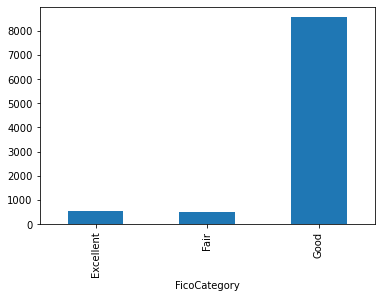

In [45]:
#number of loans/rows by ficoCategory

catplot = loanData.groupby(['FicoCategory']).size()
catplot.plot.bar()
plt.show()

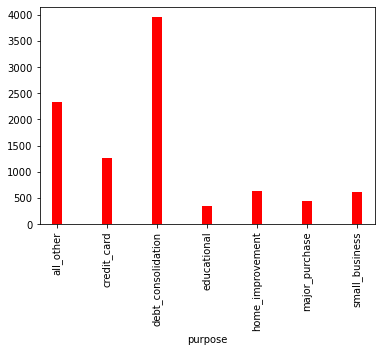

In [47]:
#number of rows by purpose
PurposeCount = loanData.groupby(['purpose']).size()
PurposeCount.plot.bar(color = 'red', width = 0.2)
plt.show()

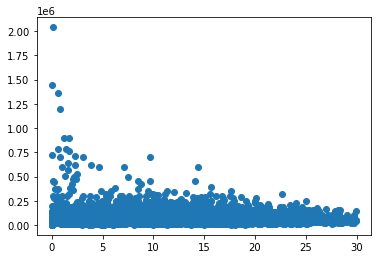

In [49]:
#scatteplot
xaxis = loanData['dti']
yaxis = loanData['annual.income']
plt.scatter(xaxis, yaxis)
plt.show()

In [50]:
#Export to csv
loanData.to_csv('loan_cleaned.csv', index = True)